In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time

In [12]:
np.random.seed(9999)

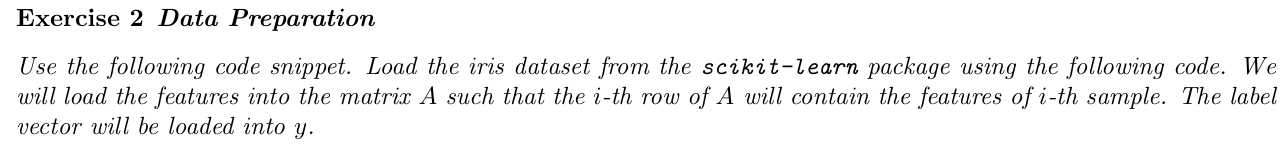

In [2]:
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
print("Data Shape: ", iris.data.shape)
A = iris.data
#check the shape of iris target
print("Target Shape: ", iris.target.shape)
y = iris.target

Data Shape:  (150, 4)
Target Shape:  (150,)


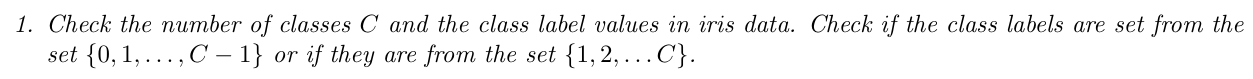

In [3]:
print("Classes in target: ", np.unique(y))

Classes in target:  [0 1 2]


In [4]:
print("Number of classes: ", len(np.unique(y)))

Number of classes:  3


It is of form {0,1,2} [0,1,..C-1] which means C=3

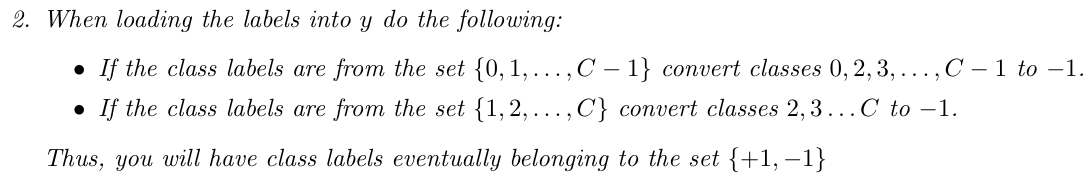

In [5]:
y.shape

(150,)

In [13]:
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points
#In the following code, we create a nx1 vector of target labels
for i in range(iris.target.shape[0]):
  if (y[i] == 0) or (y[i] == 2):
    y[i] =  -1  # Convert class labels that are not 1 into -1

In [14]:
y.shape

(150,)

In [15]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

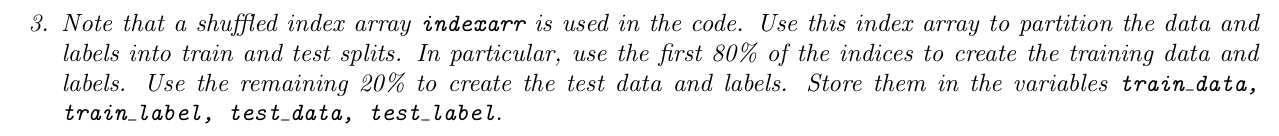

In [16]:
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
print(indexarr) #check indexarr after shuffling

[ 80   5  22 114  31  34  84   7  21  36 137   0 143  60  88 132 134 104
 118  82 111  53  95 101  52 105 120 108 133 102 100  46  87 103   1  56
  78  77 125  66  40  44  81  17  13  50  63  75  64 146  15  72  49   4
 141  97  93  23 144  55  98  71  65  62   2  51  91 117  35  59  99 138
 124  26 107 142  32 128  70  18 149  90 130  42 129   8  73  10 131   6
 121 110  94  25  27  67  29 140 106 115  57  85  48  58  37 112 127 116
 135 119 139  61 145 136  11  89  83   3  41  30  19  74   9  43 147  39
  14  45  68  28  12  20  38  79 148  96  33  69  76 122  16  24 123  92
  54 109  47 113 126  86]


In [17]:
#Use the first 80% of indexarr to create the train data and the remaining
p = int(0.8*len(indexarr))
train_data =  A[indexarr[:p]]
train_label = y[indexarr[:p]]
test_data = A[indexarr[p:]]
test_label = y[indexarr[p:]]

In [18]:
print("len of train data: ", len(train_data))
print("len of train target: ", len(train_label))
print("len of test data: ", len(test_data))
print("len of test target: ", len(test_label))

len of train data:  120
len of train target:  120
len of test data:  30
len of test target:  30


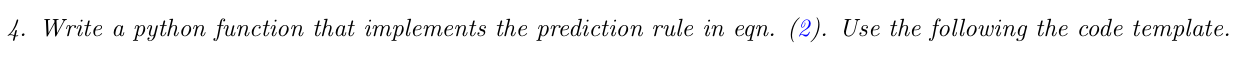

In [19]:
def predict(w,x):
  # for w^Tx = 0, since -1 is more I will bias it towards it -1
  if w@x <= 0:
    return -1
  if w@x >0:
    return 1

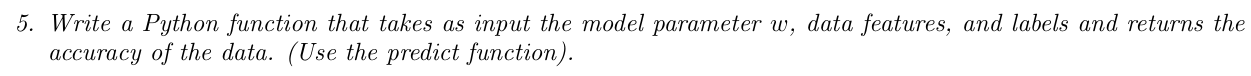

In [20]:
def compute_accuracy(data, labels, model_w):
  #Use predict function defined above
  accuracy = 0.
  assert len(data) == len(labels)
  n = data.shape[0]
  for i in range(n):
    x = data[i]
    prediction = predict(model_w, x)
    if labels[i] == prediction:
      accuracy+=1

  return accuracy/n